In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [27]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.shape

(614, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [31]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [33]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [34]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [35]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [36]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [38]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [39]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [40]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [41]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [42]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [63]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('O')
df['Credit_History'] = df['Credit_History'].astype('O')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    object 
 7   Credit_History    614 non-null    object 
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Total_Income      614 non-null    float64
dtypes: float64(2), object(9)
memory usage: 52.9+ KB


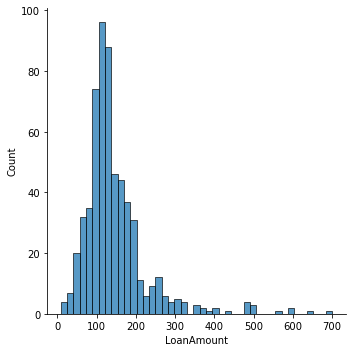

In [49]:
sns.displot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

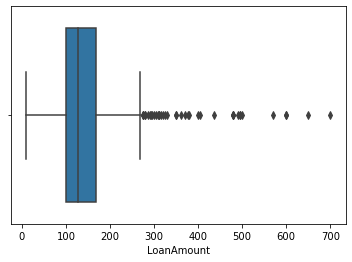

In [50]:
sns.boxplot(df['LoanAmount'])

In [51]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [56]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [57]:
df.drop(columns=['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], inplace=True)

In [65]:
df.describe()

,LoanAmount,Total_Income
count,614.000000,614.000000
mean,145.752443,7024.705081
std,84.107233,6458.663872
min,9.000000,1442.000000
25%,100.250000,4166.000000
50%,128.000000,5416.500000
75%,164.750000,7521.750000
max,700.000000,81000.000000


<Figure size 504x288 with 0 Axes>

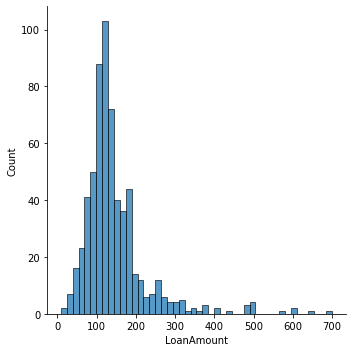

<Figure size 504x288 with 0 Axes>

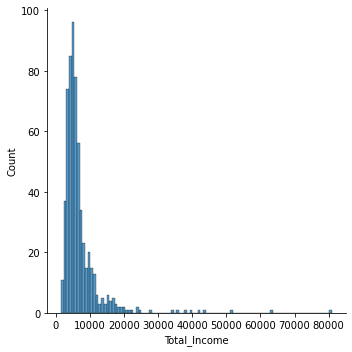

In [67]:
for col in df._get_numeric_data():
    plt.figure(figsize=(7,4))
    sns.displot(df[col])
    plt.show()

In [68]:
category_cols =df.select_dtypes('O')
category_cols

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,360.0,1.0,Urban,Y


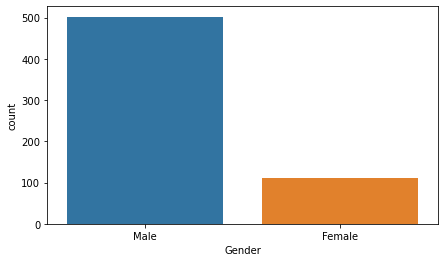

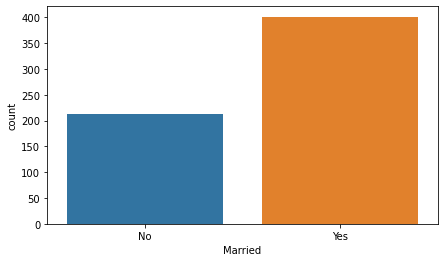

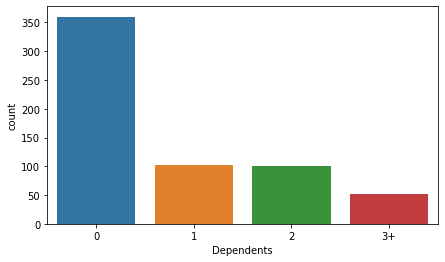

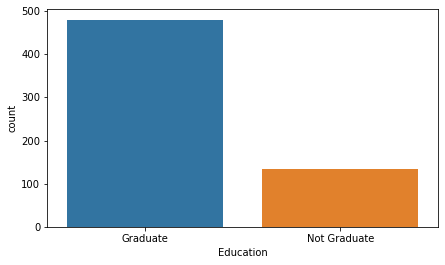

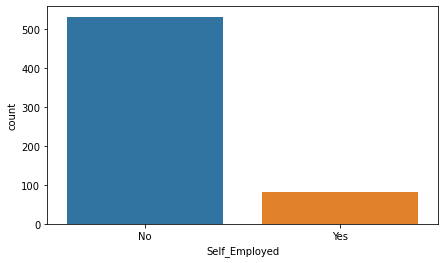

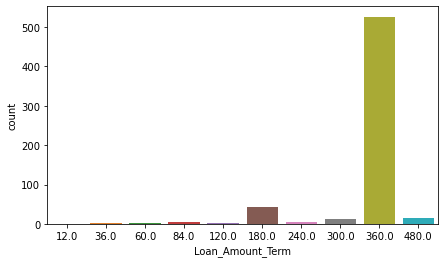

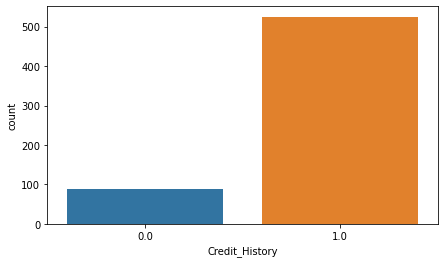

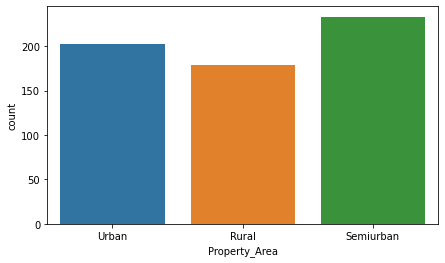

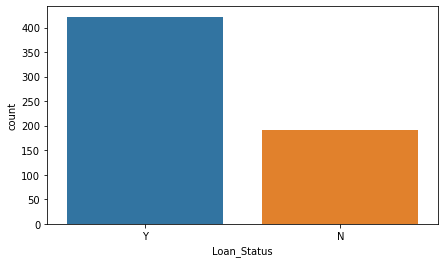

In [70]:
for col in category_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(df[col])
    plt.show()

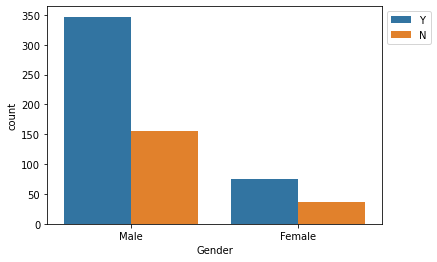

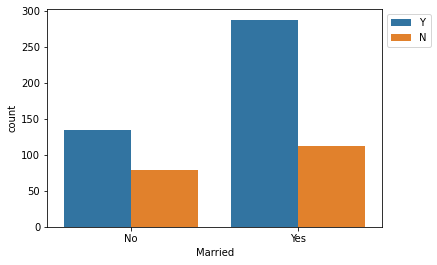

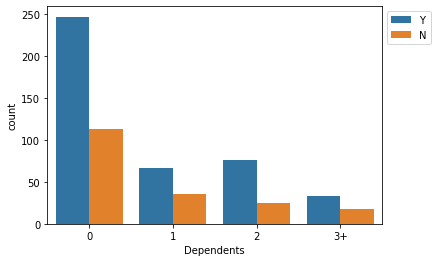

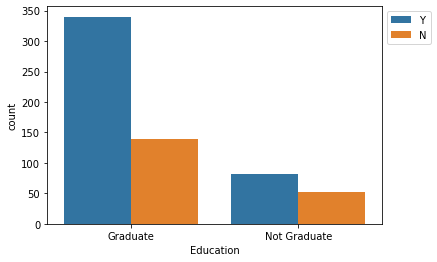

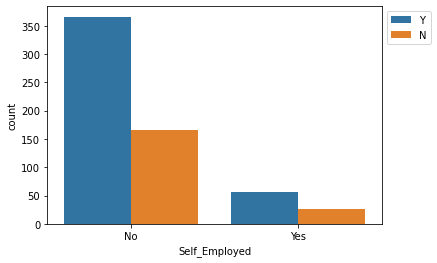

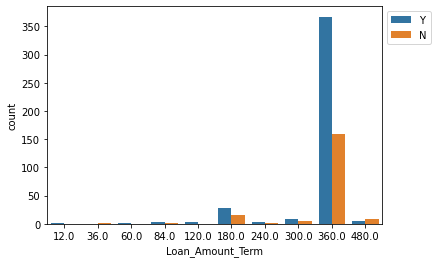

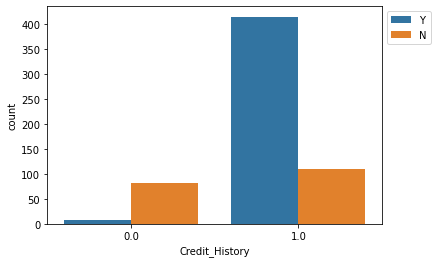

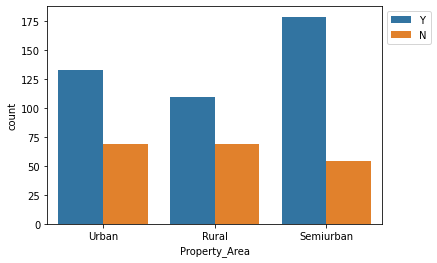

In [75]:
for col in category_cols:
    if col != 'Loan_Status' :
        sns.countplot(df[col], hue=df['Loan_Status'])
        plt.legend(bbox_to_anchor=(1,1),loc=2)
        plt.show()

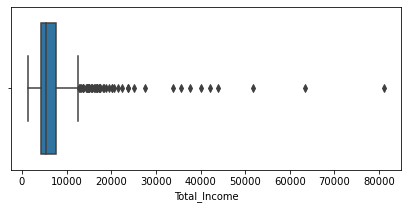

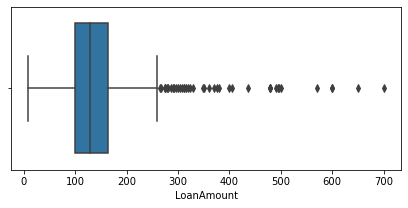

In [76]:
for col in df[['Total_Income', 'LoanAmount']]:
    plt.figure(figsize=(7,3))
    sns.boxplot(df[col])
    plt.show()

In [77]:
df.describe()

,LoanAmount,Total_Income
count,614.000000,614.000000
mean,145.752443,7024.705081
std,84.107233,6458.663872
min,9.000000,1442.000000
25%,100.250000,4166.000000
50%,128.000000,5416.500000
75%,164.750000,7521.750000
max,700.000000,81000.000000


In [80]:
df = df[(df['Total_Income']<=20000)] 

<AxesSubplot:xlabel='Total_Income'>

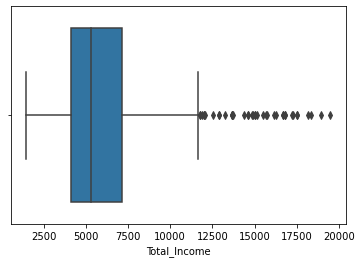

In [81]:
sns.boxplot(df['Total_Income'])

In [82]:
df =df[(df['LoanAmount']<=300)] 

<AxesSubplot:xlabel='LoanAmount'>

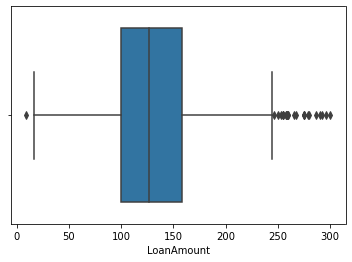

In [83]:
sns.boxplot(df['LoanAmount'])

In [84]:
df[df['LoanAmount']<20]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
14,Male,Yes,2,Graduate,No,17.0,120.0,1.0,Urban,Y,2385.0
568,Female,No,0,Graduate,No,9.0,360.0,1.0,Urban,N,2378.0


In [85]:
df = df[df['LoanAmount']>20]

In [86]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [87]:
df.shape

(576, 11)

In [88]:
df.describe()

,LoanAmount,Total_Income
count,576.000000,576.000000
mean,131.741319,5935.557153
std,50.184987,2850.071189
min,25.000000,1442.000000
25%,100.000000,4095.500000
50%,127.000000,5231.500000
75%,158.000000,6873.500000
max,300.000000,18917.000000


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

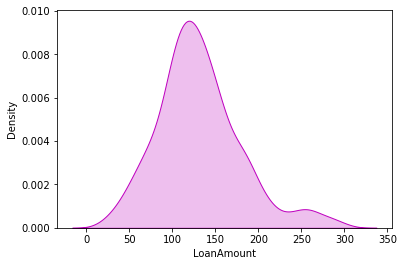

In [251]:
sns.kdeplot(df['LoanAmount'], shade=True, color='m')

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

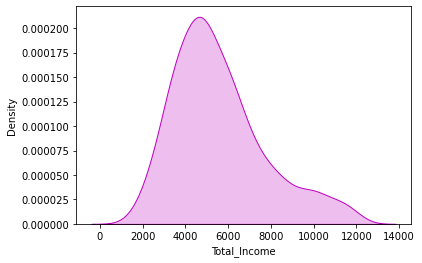

In [252]:
sns.kdeplot(df['Total_Income'], shade=True, color='m')

In [97]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


In [98]:
def encode(x):
    if x =='Male' or x =='Yes' or x=='Y':
        return 1
    elif x =='Female' or x =='No' or x=='N':
        return 0

In [99]:
df['Gender'] = df['Gender'].apply(encode)
df['Married'] = df['Married'].apply(encode)
df['Self_Employed'] = df['Self_Employed'].apply(encode)
df['Loan_Status'] = df['Loan_Status'].apply(encode)

In [100]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,Graduate,0,128.0,360.0,1.0,Urban,1,5849.0
1,1,1,1,Graduate,0,128.0,360.0,1.0,Rural,0,6091.0
2,1,1,0,Graduate,1,66.0,360.0,1.0,Urban,1,3000.0
3,1,1,0,Not Graduate,0,120.0,360.0,1.0,Urban,1,4941.0
4,1,0,0,Graduate,0,141.0,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,0,71.0,360.0,1.0,Rural,1,2900.0
610,1,1,3+,Graduate,0,40.0,180.0,1.0,Rural,1,4106.0
611,1,1,1,Graduate,0,253.0,360.0,1.0,Urban,1,8312.0
612,1,1,2,Graduate,0,187.0,360.0,1.0,Urban,1,7583.0


In [101]:
df = pd.get_dummies(data =df,  columns=['Education', 'Property_Area' ,'Dependents'])

In [102]:
df.head()

,Gender,Married,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,128.0,360.0,1.0,1,5849.0,1,0,0,0,1,1,0,0,0
1,1,1,0,128.0,360.0,1.0,0,6091.0,1,0,1,0,0,0,1,0,0
2,1,1,1,66.0,360.0,1.0,1,3000.0,1,0,0,0,1,1,0,0,0
3,1,1,0,120.0,360.0,1.0,1,4941.0,0,1,0,0,1,1,0,0,0
4,1,0,0,141.0,360.0,1.0,1,6000.0,1,0,0,0,1,1,0,0,0


In [103]:
df.shape

(576, 17)

In [112]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [118]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [536]:
models = {
    "LOR": LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    'Naive': GaussianNB(),
    'SVM': SVC(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier()
}

for name, model in models.items():
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {accuracy_score(y_test, y_pred)}')  
    print('-'*30)

Using model: LOR
Training Score: 0.8195652173913044
Test Score: 0.8448275862068966
------------------------------
Using model: KNN
Training Score: 0.7913043478260869
Test Score: 0.7758620689655172
------------------------------
Using model: Naive
Training Score: 0.8152173913043478
Test Score: 0.853448275862069
------------------------------
Using model: SVM
Training Score: 0.8173913043478261
Test Score: 0.8448275862068966
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.7844827586206896
------------------------------
Using model: RF
Training Score: 1.0
Test Score: 0.853448275862069
------------------------------
Using model: XGB
Training Score: 1.0
Test Score: 0.8275862068965517
------------------------------


# Best Accuracy

In [563]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [601]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [602]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [603]:
model = RandomForestClassifier(max_depth=10 ,n_estimators=50)

In [604]:
model.fit(x_train, y_train)
print(f'Training Score: {model.score(x_train, y_train)}')

y_pred = model.predict(x_test)
print(f'Test Score: {accuracy_score(y_test, y_pred)}')  


Training Score: 0.9260869565217391
Test Score: 0.8620689655172413
